In [4]:
import keras
from keras import layers

In [3]:
encoding_dim=32
input_img = keras.Input(shape=(784,))
encoded = layers.Dense(encoding_dim,activation='relu')(input_img)
decoded = layers.Dense(784,activation='sigmoid')(encoded)
autoencoder = keras.Model(input_img,decoded)

In [4]:
encoder = keras.Model(input_img,encoded)

In [5]:
encoded_input = keras.Input(shape=(encoding_dim,))
decoder_layer = autoencoder.layers[-1]
decoder = keras.Model(encoded_input,decoder_layer(encoded_input))

In [6]:
autoencoder.compile(optimizer='adam',loss='binary_crossentropy')

In [7]:
encoder.compile(optimizer='adam',loss='binary_crossentropy')

In [39]:
from keras.datasets import mnist
import numpy as np

In [40]:
(x_train,_),(x_test,_) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [43]:
x_train = x_train.astype('float32')/255.
x_test = x_test.astype('float32')/255.


In [11]:
x_train.shape,x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [12]:
x_train = x_train.reshape(60000,784)
x_test = x_test.reshape(10000,784)

In [13]:
x_train.shape,x_test.shape

((60000, 784), (10000, 784))

In [14]:
autoencoder.fit(x_train,x_train,epochs=15,batch_size=64,shuffle=True,validation_data=(x_test,x_test))

Epoch 1/15
938/938 [==============================] - 5s 5ms/step - loss: 0.1898 - val_loss: 0.1329
Epoch 2/15
938/938 [==============================] - 6s 6ms/step - loss: 0.1198 - val_loss: 0.1078
Epoch 3/15
938/938 [==============================] - 4s 4ms/step - loss: 0.1033 - val_loss: 0.0976
Epoch 4/15
938/938 [==============================] - 4s 5ms/step - loss: 0.0970 - val_loss: 0.0943
Epoch 5/15
938/938 [==============================] - 6s 6ms/step - loss: 0.0951 - val_loss: 0.0934
Epoch 6/15
938/938 [==============================] - 4s 5ms/step - loss: 0.0944 - val_loss: 0.0929
Epoch 7/15
938/938 [==============================] - 4s 4ms/step - loss: 0.0941 - val_loss: 0.0926
Epoch 8/15
938/938 [==============================] - 6s 6ms/step - loss: 0.0939 - val_loss: 0.0926
Epoch 9/15
938/938 [==============================] - 5s 5ms/step - loss: 0.0937 - val_loss: 0.0922
Epoch 10/15
938/938 [==============================] - 4s 4ms/step - loss: 0.0936 - val_loss: 0.0921

In [15]:
encoded_imgs = encoder.predict(x_test)

313/313 [==============================] - 0s 1ms/step


In [16]:
decoded_imgs = decoder.predict(encoded_imgs)

313/313 [==============================] - 0s 1ms/step


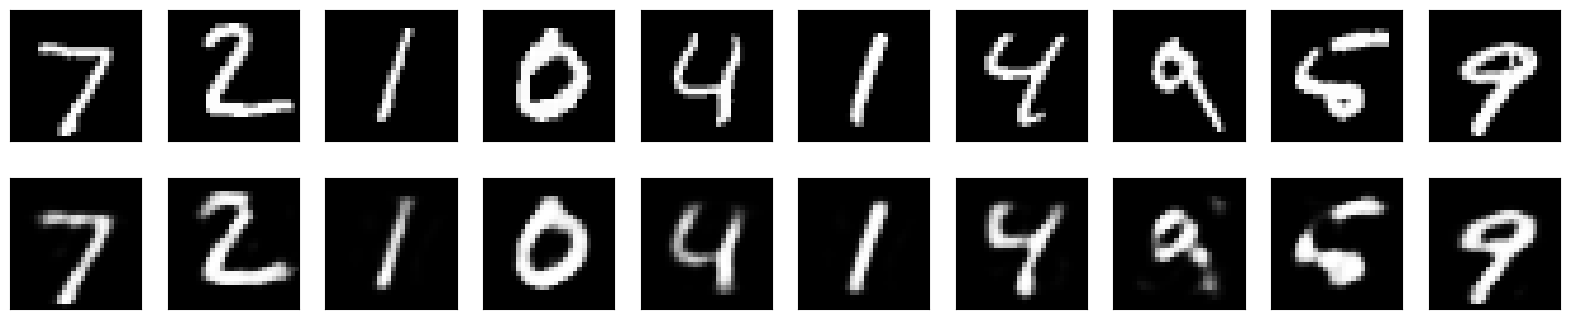

In [17]:
import matplotlib.pyplot as plt
n=10
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)




    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()






313/313 [==============================] - 0s 1ms/step


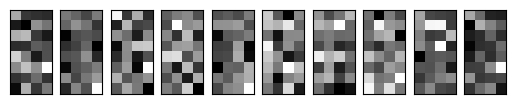

In [18]:
encoder = keras.Model(input_img, encoded)
encoded_imgs = encoder.predict(x_test)

import matplotlib.pyplot as plt

n = 10

for i in range(1,n+1):
    ax = plt.subplot(1, n, i)
    plt.imshow(encoded_imgs[i].reshape((4, 8)).T)
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()


In [20]:
from keras.callbacks import TensorBoard

autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test),
                callbacks=[TensorBoard(log_dir='/tmp/autoencoder')])

Epoch 1/50
469/469 [==============================] - 4s 8ms/step - loss: 0.0929 - val_loss: 0.0916
Epoch 2/50
469/469 [==============================] - 3s 6ms/step - loss: 0.0928 - val_loss: 0.0917
Epoch 3/50
469/469 [==============================] - 3s 6ms/step - loss: 0.0929 - val_loss: 0.0917
Epoch 4/50
469/469 [==============================] - 5s 10ms/step - loss: 0.0929 - val_loss: 0.0917
Epoch 5/50
469/469 [==============================] - 3s 7ms/step - loss: 0.0929 - val_loss: 0.0916
Epoch 6/50
469/469 [==============================] - 3s 7ms/step - loss: 0.0929 - val_loss: 0.0916
Epoch 7/50
469/469 [==============================] - 3s 7ms/step - loss: 0.0928 - val_loss: 0.0916
Epoch 8/50
469/469 [==============================] - 7s 15ms/step - loss: 0.0928 - val_loss: 0.0916
Epoch 9/50
469/469 [==============================] - 6s 13ms/step - loss: 0.0928 - val_loss: 0.0917
Epoch 10/50
469/469 [==============================] - 7s 15ms/step - loss: 0.0928 - val_loss: 0.

In [21]:
encoded_imgs = encoder.predict(x_test)

313/313 [==============================] - 1s 2ms/step


In [22]:
decoded_imgs = decoder.predict(encoded_imgs)

313/313 [==============================] - 1s 2ms/step


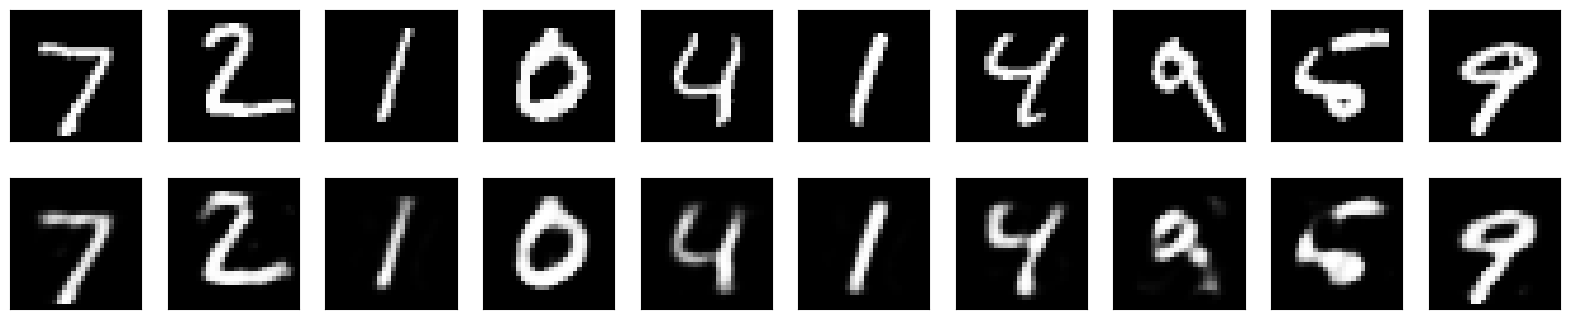

In [23]:
import matplotlib.pyplot as plt
n=10
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)




    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()






313/313 [==============================] - 0s 1ms/step


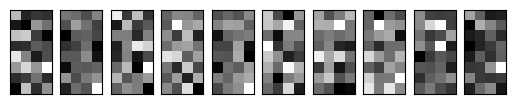

In [24]:
encoder = keras.Model(input_img, encoded)
encoded_imgs = encoder.predict(x_test)

import matplotlib.pyplot as plt

n = 10

for i in range(1,n+1):
    ax = plt.subplot(1, n, i)
    plt.imshow(encoded_imgs[i].reshape((4, 8)).T)
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()


In [34]:
input_img = keras.Input(shape=(28,28,1))

In [35]:
x = layers.Conv2D(16,(3,3),activation='relu',padding='same')(input_img)
x = layers.MaxPooling2D((2,2),padding='same')(x)
x = layers.Conv2D(8,(3,3),activation='relu',padding='same')(x)
x = layers.MaxPooling2D((2,2),padding='same')(x)
x = layers.Conv2D(8,(3,3),activation='relu',padding='same')(x)
encoded = layers.MaxPooling2D((2,2),padding='same')(x)

x = layers.Conv2D(8,(3,3),activation='relu',padding='same')(encoded)
x = layers.UpSampling2D((2,2))(x)
x = layers.Conv2D(8,(3,3),activation='relu',padding='same')(x)
x = layers.UpSampling2D((2,2))(x)
x = layers.Conv2D(16,(3,3),activation='relu')(x)
x = layers.UpSampling2D((2,2))(x)
decoded = layers.Conv2D(1,(3,3),activation='sigmoid',padding='same')(x)


In [12]:
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf
import matplotlib.pyplot as plt


In [5]:
import pathlib
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
archive = tf.keras.utils.get_file(origin=dataset_url, extract=True)
data_dir = pathlib.Path(archive).with_suffix('')

228813984/228813984 [==============================] - 1s 0us/step


In [6]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


In [7]:
BATCH_SIZE = 32

IMG_WIDTH  = 96
IMG_HEIGHT = 96

ENCODING_SIZE = 8

In [8]:
flower_generator = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  seed = 84,
  image_size = (IMG_HEIGHT, IMG_WIDTH),
  batch_size = BATCH_SIZE,
  labels = 'inferred'
)

# keep the flower names for future reference
flower_names = flower_generator.class_names

training_generator = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  seed = 42,
  image_size = (IMG_HEIGHT, IMG_WIDTH),
  batch_size = BATCH_SIZE,
  labels = None,
  validation_split = 0.2,
  subset = 'training'
)

validation_generator = tf.keras.preprocessing.image_dataset_from_directory(
 data_dir,
  seed = 42,
  image_size = (IMG_HEIGHT, IMG_WIDTH),
  batch_size = BATCH_SIZE,
  labels = None,
  validation_split = 0.2,
  subset = 'validation'
)


def replicate_inputs_to_outputs(images):
  return images/255, images/255

# create prefetch generators to speed things up a bit
training_generator = training_generator.prefetch(128)
validation_generator = validation_generator.prefetch(128)

# create the final generators to be used in training the autoencoders
X_train = training_generator.map(replicate_inputs_to_outputs)
X_valid = validation_generator.map(replicate_inputs_to_outputs)


Found 3670 files belonging to 5 classes.
Found 3670 files belonging to 1 classes.
Using 2936 files for training.
Found 3670 files belonging to 1 classes.
Using 734 files for validation.


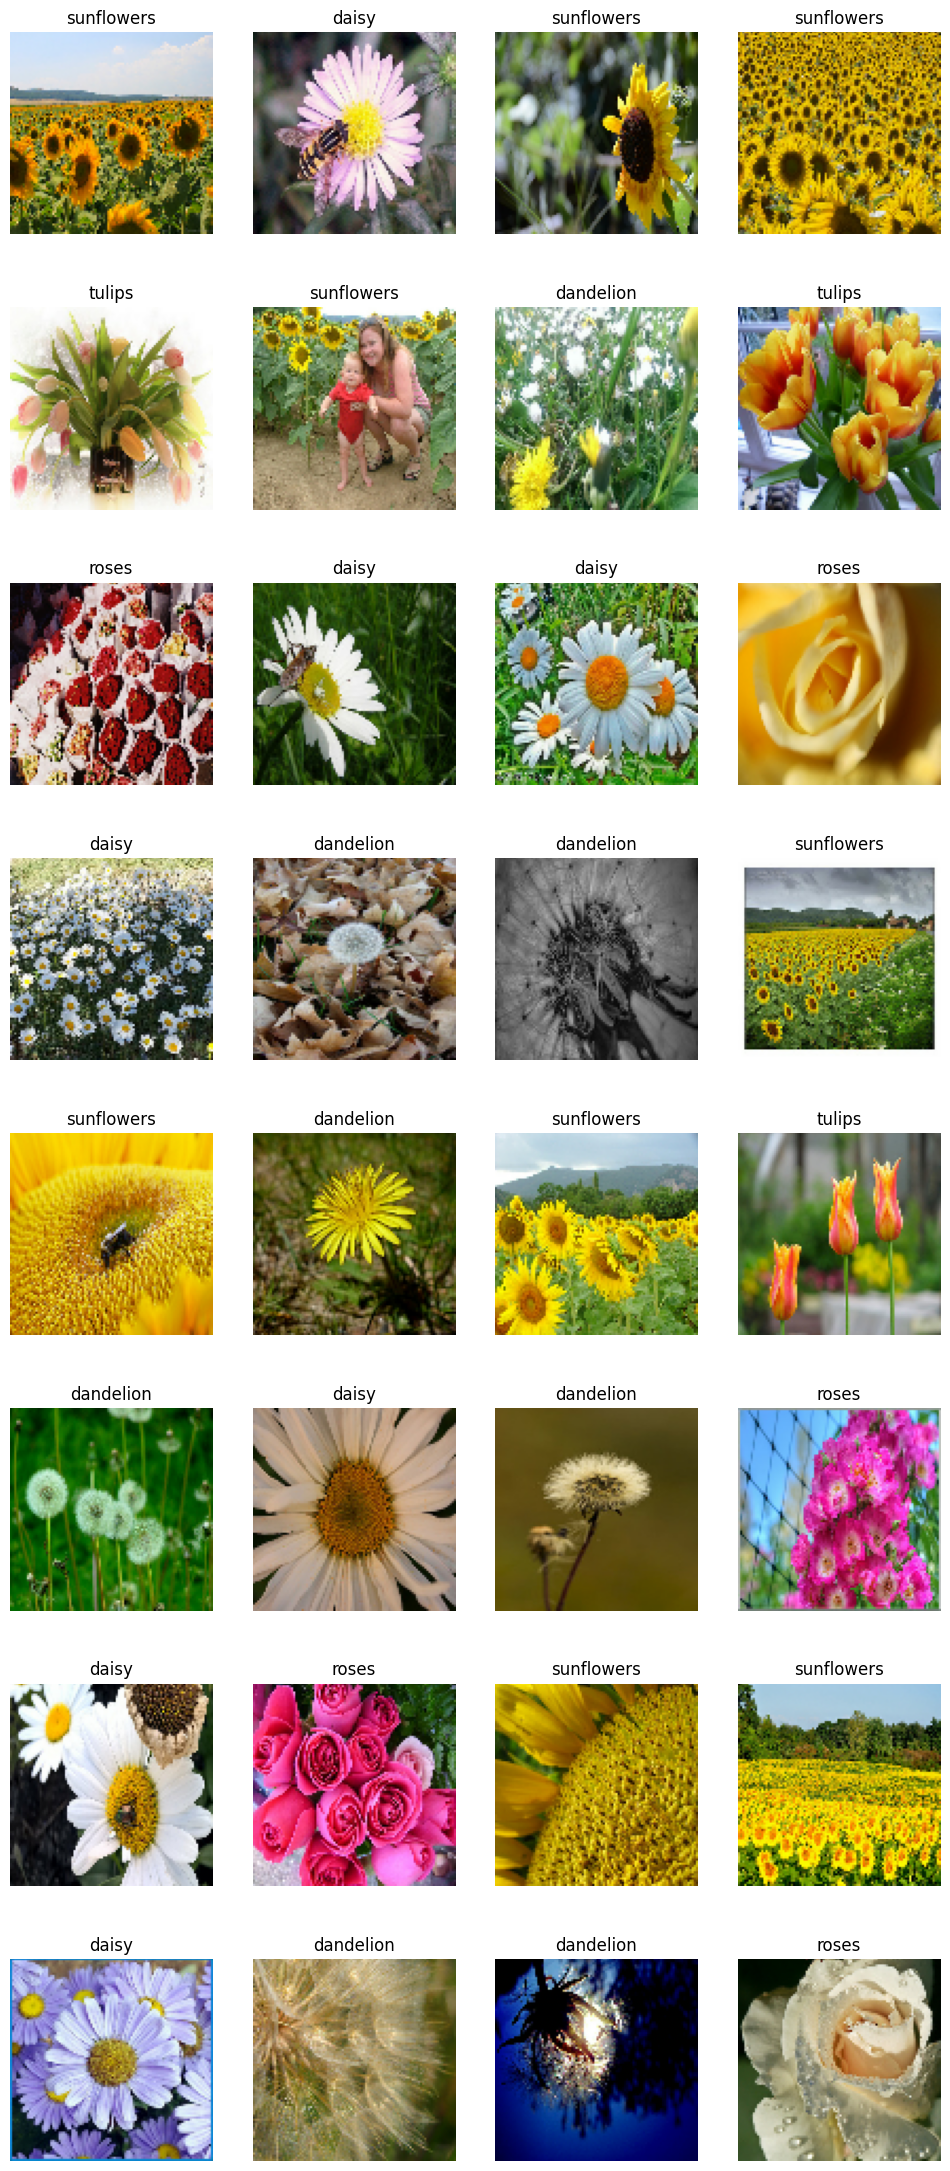

In [13]:
plt.figure(figsize=(12,28))

for images,labels in flower_generator.take(1):
  for i in range(len(images)):
    ax = plt.subplot(8,4,i+1)
    plt.imshow(images[i].numpy().astype('uint8'))
    plt.title(flower_names[labels[i]])
    plt.axis('off')

In [14]:
encoding_size = 1024

new_encoder = keras.models.Sequential(
    [
        keras.layers.Conv2D(32,input_shape=[IMG_HEIGHT,IMG_WIDTH,3],kernel_size=3,padding='same',activation='relu'),
        keras.layers.MaxPool2D(),
        keras.layers.Conv2D(64,kernel_size=3,padding='same',activation='relu'),
        keras.layers.MaxPool2D(),
        keras.layers.Conv2D(128,kernel_size=3,padding='same',activation='relu'),
        keras.layers.Flatten(),
        keras.layers.Dense(encoding_size)

    ]
)

new_encoder.summary()
new_decoder = keras.models.Sequential(
    [
      keras.layers.Dense(128*24*24,activation='relu',input_shape=[encoding_size]),
      keras.layers.Reshape([24,24,128]),
      keras.layers.Conv2DTranspose(filters=64,kernel_size=3,strides=2,padding='same',activation='relu'),
      keras.layers.Conv2DTranspose(filters=32,kernel_size=3,strides=2,padding='same',activation='relu'),
      keras.layers.Conv2DTranspose(filters=3,kernel_size=3,padding='same',activation='sigmoid')

    ]
)

new_decoder.summary()
ae = keras.models.Sequential([new_encoder,new_decoder])


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 96, 96, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 48, 48, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 48, 48, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 24, 24, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 24, 24, 128)       73856     
                                                                 
 flatten (Flatten)           (None, 73728)             0

In [15]:
ae.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 1024)              75591744  
                                                                 
 sequential_1 (Sequential)   (None, 96, 96, 3)         75664323  
                                                                 
Total params: 151256067 (577.00 MB)
Trainable params: 151256067 (577.00 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [16]:
def exponential_decay(epoch):
  return 0.001*0.1**(epoch/10)


lr_scheduler = keras.callbacks.LearningRateScheduler(exponential_decay)
early_stopping = keras.callbacks.EarlyStopping(patience=5,restore_best_weights=True)



keras.backend.clear_session()
tf.random.set_seed(42)

ae.compile(loss='mean_squared_error',optimizer=keras.optimizers.Adam())


In [18]:
history = ae.fit(X_train,validation_data =X_valid,epochs=50,callbacks=[lr_scheduler,early_stopping])

Epoch 1/50
92/92 [==============================] - 11s 107ms/step - loss: 0.0604 - val_loss: 0.0390 - lr: 0.0010
Epoch 2/50
92/92 [==============================] - 8s 86ms/step - loss: 0.0351 - val_loss: 0.0336 - lr: 7.9433e-04
Epoch 3/50
92/92 [==============================] - 8s 83ms/step - loss: 0.0308 - val_loss: 0.0303 - lr: 6.3096e-04
Epoch 4/50
92/92 [==============================] - 8s 86ms/step - loss: 0.0281 - val_loss: 0.0282 - lr: 5.0119e-04
Epoch 5/50
92/92 [==============================] - 9s 91ms/step - loss: 0.0258 - val_loss: 0.0265 - lr: 3.9811e-04
Epoch 6/50
92/92 [==============================] - 9s 91ms/step - loss: 0.0242 - val_loss: 0.0256 - lr: 3.1623e-04
Epoch 7/50
92/92 [==============================] - 8s 82ms/step - loss: 0.0230 - val_loss: 0.0247 - lr: 2.5119e-04
Epoch 8/50
92/92 [==============================] - 9s 90ms/step - loss: 0.0221 - val_loss: 0.0243 - lr: 1.9953e-04
Epoch 9/50
92/92 [==============================] - 8s 86ms/step - loss: 0

In [20]:
ae.save('trained_autoencoder.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [21]:
from tensorflow.keras.models import load_model
ae = load_model('/content/trained_autoencoder.h5')

In [22]:
encoder0 = ae.layers[0]

1/1 [==============================] - 0s 242ms/step


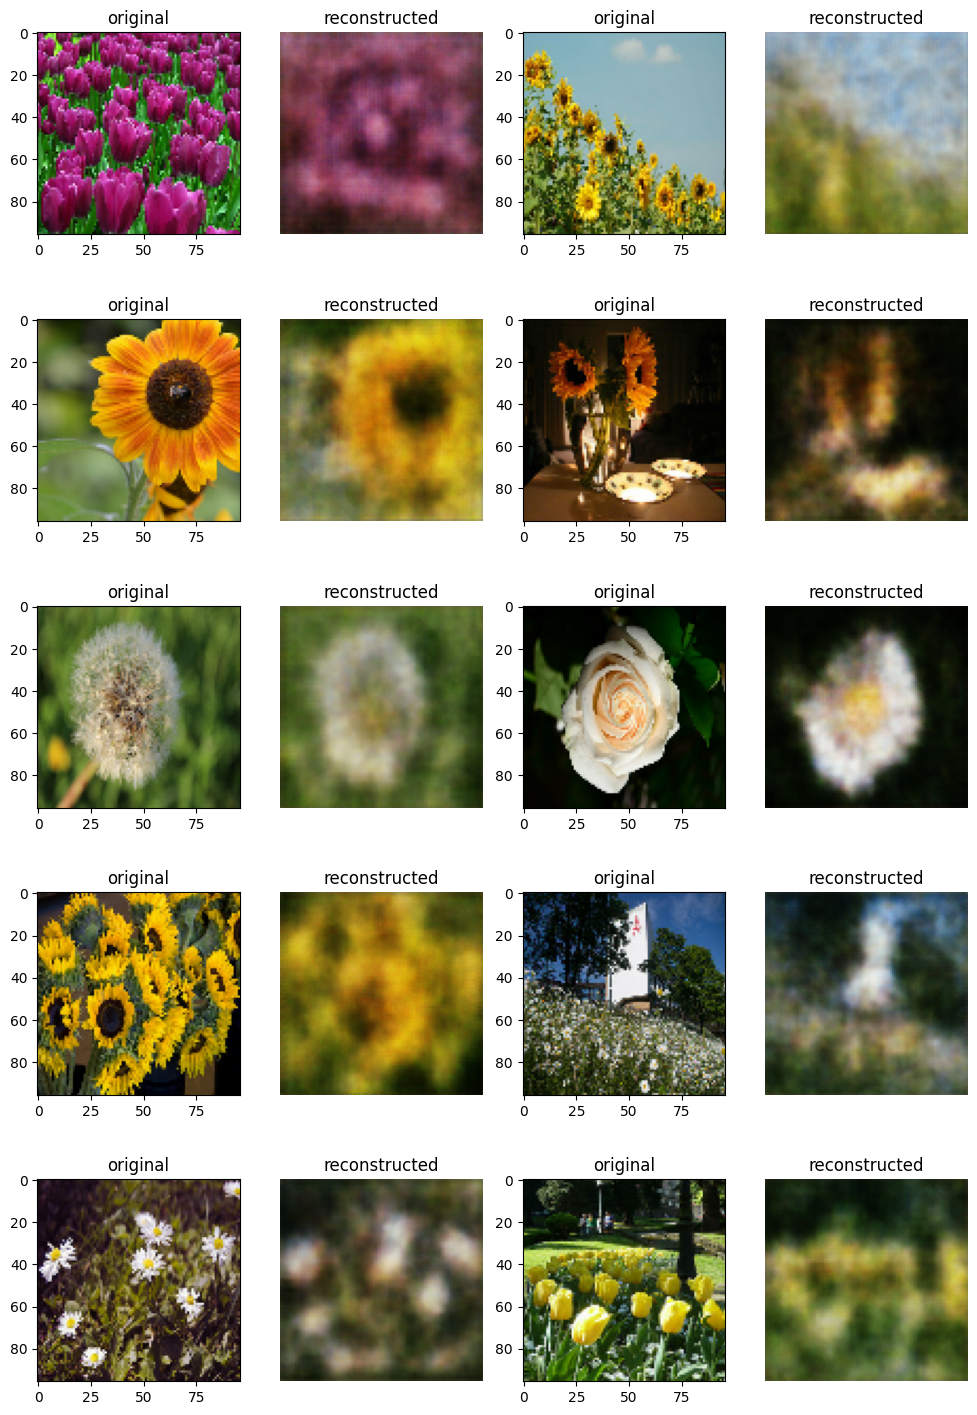

In [23]:
plt.figure(figsize=(12,18))

for images,_ in X_valid.take(1):
  ae_img = ae.predict(images)

  for i in range(10):
    ax = plt.subplot(5,4,(i*2)+1)
    plt.imshow(images[i])
    plt.title('original')


    ax = plt.subplot(5,4,(i*2)+2)
    plt.imshow(ae_img[i])
    plt.title('reconstructed')
    plt.axis('off')

In [27]:
flower_generator = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  seed = 84,
  image_size = (IMG_HEIGHT, IMG_WIDTH),
  batch_size = BATCH_SIZE,
  labels = 'inferred'
)

# get the embeddings and labels for the training set
embeddings = []
labels = []

for images, lbls in flower_generator:
    embeddings.append(encoder0.predict(images))
    labels.append(lbls)

embeddings = np.concatenate(embeddings, axis = 0)
labels = np.concatenate(labels, axis = 0)

Found 3670 files belonging to 5 classes.
1/1 [==============================] - 0s 300ms/step
